Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

Differential Neutron-Nucleus Cross Sections
===========================================

The aim of this work is to compare the new neutron-electron magnetic process to other neutron-induced processes for rare-event background studies. The neutron-nuclear process is the competing process in the low energy regime. Recoil spectra from this process depend on the differential cross section of the neutron-nuclear scattering. Here we explain our processes for obtaining our estimates for these cross sections. 


ENDF6 Files
-----------

The Evaluated Nuclear Database File (ENDF) has been the format for compiling and transmitting the nuclear data for many years. The [[ENDF/B-VIII.0][ENDF/B-VIII]] (2018) is the most recent evaluation we have copied these files in the directory `xn_data/` which includes official ENDF6 files with the extension `.endf` and files with the extension `.txt` that include the total elastic cross section data.

The differential Center-of-Mass (CoM) cross section data is encoded either in tabulated form (a number in the file for each angular point) or in terms of Legendre coefficients. The cross sections that we have used are in terms of the Legendre coefficients according to the equation below. The function $\sigma(\mu,E)$ is the angular cross section in $\mu \equiv \cos{\theta}$ for each incoming neutron energy $E$. 

\begin{equation}
f(\mu,E) = \frac{2\pi}{\sigma_s(E)} \sigma(\mu,E) = \sum_{l=0}^{N_l} \frac{2l+1}{2}a_l(E)P_l(\mu)
\end{equation}


[ENDF/B-VIII]: https://www.nndc.bnl.gov/endf-b8.0/download.html "ENDF/B-VIII.0 Documentation"

Total Elastic Cross Section Data
--------------------------------

The total cross elastic section as a function of neutron energy is needed to find the differential CoM cross sections, as can be seen by the equation above. The evaluated total cross section is included in the `.endf` files, but in the awkward Reich-Moore parameterization. Instead, we downloaded tabular data for the total cross section from the web interface [[Elastic XN][Elastic XN]]. For example, to get the $^{28}$Si elastic cross section we went to the site and filled out the form as follows, selecting only ENDF VIII.0 data.

![ENDF Online](figures/ENDF-VIII.0-Online.png "ENDF Online Data Plotter")

Then, we retrieved the data and did a "quick plot" which shows the total cross section as below.

![ENDF Online](figures/ENDF-VIII.0-28Si-Elastic.png "28-Si Elastic Cross Section from Online Plotter")

To save the data to our repository we clicked on the "plotted data" link on the right side, then saved the resulting page as a `.txt` file into our top-level directory `xn_data/`.

[Elastic XN]: https://www.nndc.bnl.gov/endf/ "cross sections online"

Plotting the Elastic Cross Section with Our Library
---------------------------------------------------

Our library is called `ENDF6el.py` and loads the data from the directory `data_files/xn_data/`. Below we open the library and plot the $^{28}$Si neutron elastic cross section. The function `fetch_elastic` does the work. 

In [2]:
import ENDF6el as endfel

f=endfel.fetch_elastic(filename='../data_files/xn_data/si28_el.txt')
En= np.geomspace(1e-11, 100, 1000)

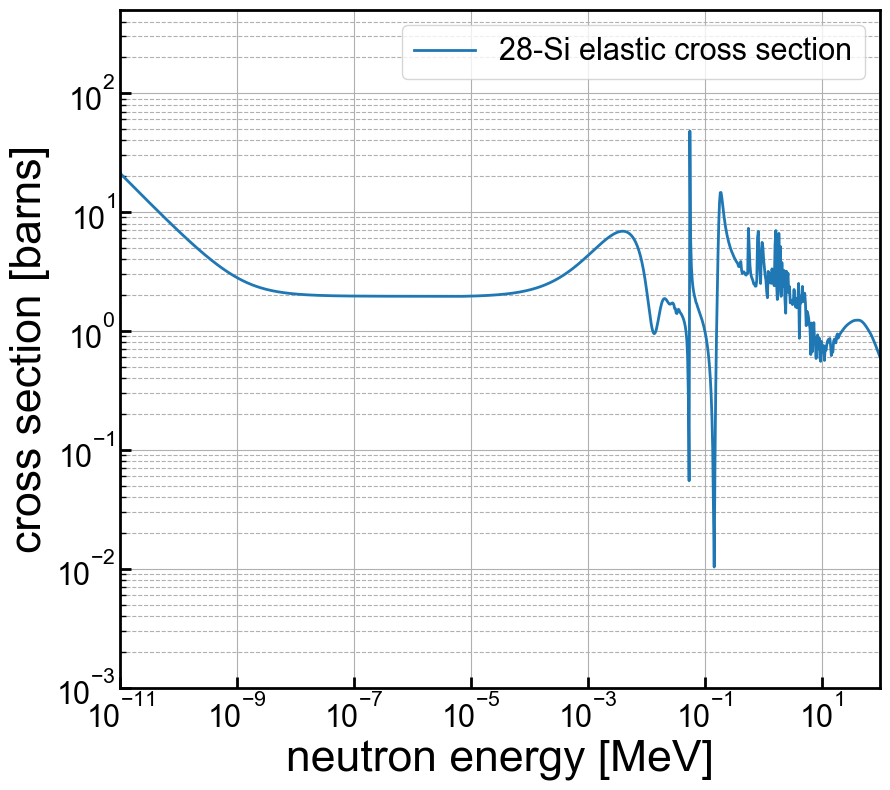

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.plot(En, f(En),label="28-Si elastic cross section")



ymin = 1e-3
ymax = 5e2


plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-11, 100) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('cross section [barns]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

Plotting the Elastic Differential Cross Section with Our Library
----------------------------------------------------------------

For this the `.endf` files must be read and interpreted (to extract the Legendre coefficients $a_l$). We can get the coefficients for all the included energy points in the file with `fetch_elastic_angular`. Note that $a_0$ is not in the file and is _understood to be 1.0_. 

In [4]:
(en,al)=endfel.fetch_elastic_angular('../data_files/xn_data/n-014_Si_028.endf')

In [5]:
print('Read Legendre Coefficients')
print('==========================')
for i,E in enumerate(en):
    print('{} MeV'.format(E/1e6),end=" ")
    print('\t a0={}'.format(1.0),end=" ")
    for j,a in enumerate(al[i,:]):
        if(a==0.0):
            break
        if(((j+1)%6==0)&(al[i,j+1]!=0.0)):
            print('\t a{}={}'.format(j+1,a))
            print('\t',end=" ")
        else:
            print('\t a{}={}'.format(j+1,a),end=" ")
       
    print('')

Read Legendre Coefficients
1.0000000000000001e-11 MeV 	 a0=1.0 
0.04 MeV 	 a0=1.0 	 a1=0.029357 	 a2=0.00035734 	 a3=4.154e-05 
0.052 MeV 	 a0=1.0 	 a1=0.057182 	 a2=0.0013868 	 a3=6.3339e-05 
0.054 MeV 	 a0=1.0 	 a1=-0.0021203 	 a2=0.0029461 	 a3=2.4982e-05 
0.13 MeV 	 a0=1.0 	 a1=0.13967 	 a2=0.0089705 	 a3=0.00020958 
0.14 MeV 	 a0=1.0 	 a1=0.14187 	 a2=0.016863 	 a3=0.00040949 
0.15 MeV 	 a0=1.0 	 a1=-0.048419 	 a2=0.015225 	 a3=0.00040025 
0.16 MeV 	 a0=1.0 	 a1=-0.085821 	 a2=0.0030059 	 a3=9.3495e-05 
0.2 MeV 	 a0=1.0 	 a1=0.016878 	 a2=0.00078826 	 a3=2.2468e-05 
0.4 MeV 	 a0=1.0 	 a1=0.08396 	 a2=0.006461 	 a3=0.00031806 
0.51525 MeV 	 a0=1.0 	 a1=0.0074407 	 a2=-0.010977 	 a3=-0.00048842 
0.52775 MeV 	 a0=1.0 	 a1=-0.012764 	 a2=-0.055162 	 a3=0.00024526 
0.53025 MeV 	 a0=1.0 	 a1=0.012248 	 a2=0.0026649 	 a3=0.0028172 
0.53275 MeV 	 a0=1.0 	 a1=-0.046097 	 a2=0.3122 	 a3=-0.0010363 
0.53525 MeV 	 a0=1.0 	 a1=-0.10274 	 a2=0.12874 	 a3=-0.0046229 
0.54025 MeV 	 a0=1.0 	 a1=-0

If we wish to get the function for the CoM differential cross section in $\cos{\theta}$ then we use the function `fetch_diff_xn`. We can supply the total elastic cross section function that was obtained by `fetch_elastic` to greatly speed up the process of reading and computing the differential cross section, or we can simply specify the filename that the elastic cross section uses. 

In [7]:
#slow version, opens files for EVERY CALL
diffxn_slow=endfel.fetch_diff_xn(En=1e6,sigtotfile='../data_files/xn_data/si28_el.txt',endffile='../data_files/xn_data/n-014_Si_028.endf')



#OR you can use the following to get the same coefficients as individual functions of E
l = np.arange(0,64)
acoeff = endfel.al(l,endffile='../data_files/xn_data/n-014_Si_028.endf')
diffxn_fast=endfel.fetch_diff_xn(En=1e6,f=f,a=acoeff)